# import install

A Fast, Extensible Progress Bar for Python
https://github.com/tqdm/tqdm

In [104]:
# !pip install tqdm

Industrial-Strength Natural Language Processing (NLP)
https://spacy.io/

In [105]:
# !pip install spacy==2.3.7

In [106]:
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz 

Language detection library
ported from Google's language-detection.
https://pypi.org/project/langdetect/

In [107]:
# !pip install langdetect

# Exploration

In [108]:
import sys
sys.path.append('../library/')
# Own library
import FilrougeMLIOLibrary as MLOI

from matplotlib import pyplot as plt

# data loading

In [109]:
df = MLOI.LoadArticles('','art.json')

In [110]:
df = df.T

In [111]:
df.reset_index(inplace=True)

In [112]:
df

,index,Title,Abstract,Body,RefTo,Authors,RefBy,DatePub,url,LibName,Similar
0,doi:10.1016/j.jhep.2020.01.028.,[Full-length 5'RACE identifies all major HBV t...,[Background & aims: Covalen...,,,"{'Name': ['Bernd Stadelmayer', 'Audrey Diederi...",,2020 Feb 20,/32087349/,PubMed,
1,doi:10.3390/biom11121822.,[RNR-R2 Upregulation by a Short Non-Coding Vir...,[DNA viruses require dNTPs for replication and...,,,"{'Name': ['Karin Broennimann', 'Inna Ricardo-L...",,,/34944466/,PubMed,
2,doi:10.1016/j.jhep.2015.05.017.,[Hepatitis B virus induces RNR-R2 expression v...,[Background & aims: Hepatit...,,,"{'Name': ['Inna Ricardo-Lax', 'Vyas Ramanan', ...",,2015 May 27,/26026873/,PubMed,
3,doi:10.3390/v13081463.,[Mechanism of Hepatitis B Virus cccDNA Formation],[Hepatitis B virus (HBV) remains a major medic...,,,"{'Name': ['Lei Wei', 'Alexander Ploss', 'Lei W...",,,/34452329/,PubMed,
4,doi:10.3390/vaccines9111333.,[Improving Therapeutic Vaccination against Hep...,[Chronic hepatitis B affects more than 250 mil...,,,"{'Name': ['Percy A Knolle', 'Li-Rung Huang', '...",,,/34835264/,PubMed,
...,...,...,...,...,...,...,...,...,...,...,...
10074,PMIDPMID: 4351110,[[Seasonal rhythms in the functioning of the e...,[],,,"{'Name': ['M G Kolpakov', 'S G Kolaeva', 'G S ...",,,/4351110/,PubMed,
10075,doi:10.1152/ajplegacy.1956.186.3.414.,[Physiologic 24-hour periodicity and hepatic p...,[],,,"{'Name': ['C P BARNUM', 'J J BITTNER', 'F HALB...",,,/13362550/,PubMed,
10076,doi:10.1210/endo-59-3-364.,[Adrenal hormones and phospholipid metabolism ...,[],,,"{'Name': ['C P BARNUM', 'E HALBERG', 'F HALBER...",,,/13375552/,PubMed,
10077,PMIDPMID: 13090978,[[Studies on the effects of nitrogen mustard a...,[],,,"{'Name': ['R FRANKE', 'F H THIELE', 'N KELLER'...",,,/13090978/,PubMed,


# cleaning data

In [113]:
df.dropna(inplace=True)
df.drop(df[df['Abstract'].map(len) == 0].index, inplace=True) # delete where abstract is an empty array
df.drop(df[df['Title'].map(len) == 0].index, inplace=True) # delete where title is an empty array
df['Abstract2'] = [' '.join(map(str, l)) for l in df['Abstract']] # concat array in a single string
df['Title2'] = [' '.join(map(str, l)) for l in df['Title']]


In [114]:
df

,index,Title,Abstract,Body,RefTo,Authors,RefBy,DatePub,url,LibName,Similar,Abstract2,Title2
0,doi:10.1016/j.jhep.2020.01.028.,[Full-length 5'RACE identifies all major HBV t...,[Background & aims: Covalen...,,,"{'Name': ['Bernd Stadelmayer', 'Audrey Diederi...",,2020 Feb 20,/32087349/,PubMed,,Background & aims: Covalent...,Full-length 5'RACE identifies all major HBV tr...
1,doi:10.3390/biom11121822.,[RNR-R2 Upregulation by a Short Non-Coding Vir...,[DNA viruses require dNTPs for replication and...,,,"{'Name': ['Karin Broennimann', 'Inna Ricardo-L...",,,/34944466/,PubMed,,DNA viruses require dNTPs for replication and ...,RNR-R2 Upregulation by a Short Non-Coding Vira...
2,doi:10.1016/j.jhep.2015.05.017.,[Hepatitis B virus induces RNR-R2 expression v...,[Background & aims: Hepatit...,,,"{'Name': ['Inna Ricardo-Lax', 'Vyas Ramanan', ...",,2015 May 27,/26026873/,PubMed,,Background & aims: Hepatiti...,Hepatitis B virus induces RNR-R2 expression vi...
3,doi:10.3390/v13081463.,[Mechanism of Hepatitis B Virus cccDNA Formation],[Hepatitis B virus (HBV) remains a major medic...,,,"{'Name': ['Lei Wei', 'Alexander Ploss', 'Lei W...",,,/34452329/,PubMed,,Hepatitis B virus (HBV) remains a major medica...,Mechanism of Hepatitis B Virus cccDNA Formation
4,doi:10.3390/vaccines9111333.,[Improving Therapeutic Vaccination against Hep...,[Chronic hepatitis B affects more than 250 mil...,,,"{'Name': ['Percy A Knolle', 'Li-Rung Huang', '...",,,/34835264/,PubMed,,Chronic hepatitis B affects more than 250 mill...,Improving Therapeutic Vaccination against Hepa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10064,doi:10.1523/JNEUROSCI.21-20-07937.2001.,[Oscillating on borrowed time: diffusible sign...,[The capacity to generate circadian rhythms en...,,,"{'Name': ['G Allen', 'J Rappe', 'D J Earnest',...",,,/11588167/,PubMed,,The capacity to generate circadian rhythms end...,Oscillating on borrowed time: diffusible signa...
10065,doi:10.1007/s00424-020-02381-6.,[Metabolic implications of circadian disruption],[Circadian rhythms are generated by the circad...,,,"{'Name': ['Narjis Fatima', 'Sobia Rana', 'Narj...",,2020 May 4,/32363530/,PubMed,,Circadian rhythms are generated by the circadi...,Metabolic implications of circadian disruption
10066,doi:10.1002/bies.201700216.,[Temperature-controlled Rhythmic Gene Expressi...,[The circadian clock is a cell autonomous osci...,,,"{'Name': ['Marco Preußner', 'Florian Heyd', 'M...",,2018 Jun 4,/29869389/,PubMed,,The circadian clock is a cell autonomous oscil...,Temperature-controlled Rhythmic Gene Expressio...
10067,PMIDPMID: 1910594,[Biomarkers of aging: changes in circadian rhy...,[Twenty-four hour (circadian) rhythmicity is a...,,,"{'Name': ['P H Duffy', 'R J Feuers', 'P H Duff...",,,/1910594/,PubMed,,Twenty-four hour (circadian) rhythmicity is an...,Biomarkers of aging: changes in circadian rhyt...


# Article language

## with abstract

In [115]:
tqdm.pandas() #to display progress bar

In [116]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['Abstract2'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['Abstract2'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 9901/9901 [01:15<00:00, 131.71it/s]


In [117]:
languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
print(languages_dict)

Total: 9901

{'en': 9901}


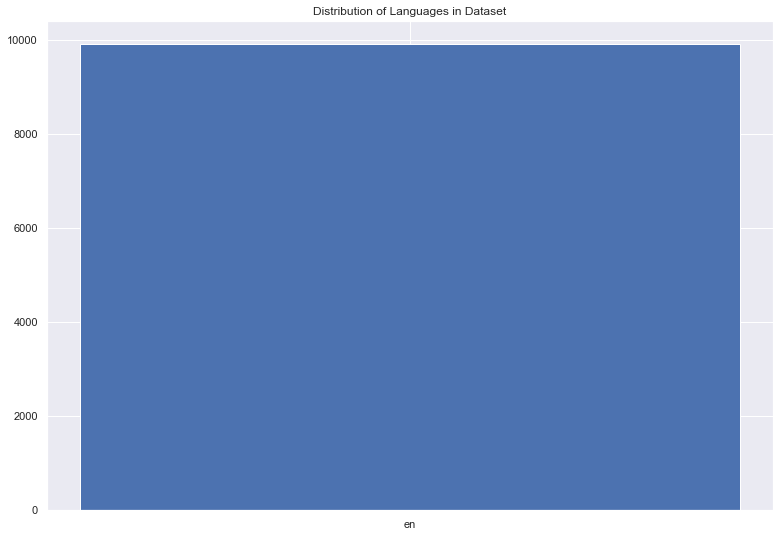

In [118]:
df['language'] = languages

inter_len = 645

plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

# NLP


In [119]:
import string
from spacy.lang.en.stop_words import STOP_WORDS

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['‘ve',
 'with',
 'first',
 'would',
 'anything',
 'even',
 'of',
 'against',
 'myself',
 'formerly']

In [120]:
# Add to stopword some customs:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [121]:
# en_core_sci_lg  => https://allenai.github.io/scispacy/
# A full spaCy pipeline for biomedical data with a larger vocabulary and 600k word vectors.

import en_core_sci_lg

parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

C:\Users\rouxa\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_sci_lg' (0.2.4) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.7). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [122]:
import spacy

In [123]:
from tqdm import tqdm
tqdm.pandas() #to display progress bar
df["processed_abstract"] = df["Abstract2"].progress_apply(spacy_tokenizer)

100%|██████████| 9901/9901 [03:18<00:00, 49.77it/s]


In [124]:
df

,index,Title,Abstract,Body,RefTo,Authors,RefBy,DatePub,url,LibName,Similar,Abstract2,Title2,language,processed_abstract
0,doi:10.1016/j.jhep.2020.01.028.,[Full-length 5'RACE identifies all major HBV t...,[Background & aims: Covalen...,,,"{'Name': ['Bernd Stadelmayer', 'Audrey Diederi...",,2020 Feb 20,/32087349/,PubMed,,Background & aims: Covalent...,Full-length 5'RACE identifies all major HBV tr...,en,background aim covalently close circular dna c...
1,doi:10.3390/biom11121822.,[RNR-R2 Upregulation by a Short Non-Coding Vir...,[DNA viruses require dNTPs for replication and...,,,"{'Name': ['Karin Broennimann', 'Inna Ricardo-L...",,,/34944466/,PubMed,,DNA viruses require dNTPs for replication and ...,RNR-R2 Upregulation by a Short Non-Coding Vira...,en,dna virus require dntps replication develope d...
2,doi:10.1016/j.jhep.2015.05.017.,[Hepatitis B virus induces RNR-R2 expression v...,[Background & aims: Hepatit...,,,"{'Name': ['Inna Ricardo-Lax', 'Vyas Ramanan', ...",,2015 May 27,/26026873/,PubMed,,Background & aims: Hepatiti...,Hepatitis B virus induces RNR-R2 expression vi...,en,background aim hepatitis b virus hbv infect re...
3,doi:10.3390/v13081463.,[Mechanism of Hepatitis B Virus cccDNA Formation],[Hepatitis B virus (HBV) remains a major medic...,,,"{'Name': ['Lei Wei', 'Alexander Ploss', 'Lei W...",,,/34452329/,PubMed,,Hepatitis B virus (HBV) remains a major medica...,Mechanism of Hepatitis B Virus cccDNA Formation,en,hepatitis b virus hbv remain major medical pro...
4,doi:10.3390/vaccines9111333.,[Improving Therapeutic Vaccination against Hep...,[Chronic hepatitis B affects more than 250 mil...,,,"{'Name': ['Percy A Knolle', 'Li-Rung Huang', '...",,,/34835264/,PubMed,,Chronic hepatitis B affects more than 250 mill...,Improving Therapeutic Vaccination against Hepa...,en,chronic hepatitis b affect 250 million individ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10064,doi:10.1523/JNEUROSCI.21-20-07937.2001.,[Oscillating on borrowed time: diffusible sign...,[The capacity to generate circadian rhythms en...,,,"{'Name': ['G Allen', 'J Rappe', 'D J Earnest',...",,,/11588167/,PubMed,,The capacity to generate circadian rhythms end...,Oscillating on borrowed time: diffusible signa...,en,capacity generate circadian rhythm endogenousl...
10065,doi:10.1007/s00424-020-02381-6.,[Metabolic implications of circadian disruption],[Circadian rhythms are generated by the circad...,,,"{'Name': ['Narjis Fatima', 'Sobia Rana', 'Narj...",,2020 May 4,/32363530/,PubMed,,Circadian rhythms are generated by the circadi...,Metabolic implications of circadian disruption,en,circadian rhythm generate circadian clock self...
10066,doi:10.1002/bies.201700216.,[Temperature-controlled Rhythmic Gene Expressi...,[The circadian clock is a cell autonomous osci...,,,"{'Name': ['Marco Preußner', 'Florian Heyd', 'M...",,2018 Jun 4,/29869389/,PubMed,,The circadian clock is a cell autonomous oscil...,Temperature-controlled Rhythmic Gene Expressio...,en,circadian clock cell autonomous oscillator con...
10067,PMIDPMID: 1910594,[Biomarkers of aging: changes in circadian rhy...,[Twenty-four hour (circadian) rhythmicity is a...,,,"{'Name': ['P H Duffy', 'R J Feuers', 'P H Duff...",,,/1910594/,PubMed,,Twenty-four hour (circadian) rhythmicity is an...,Biomarkers of aging: changes in circadian rhyt...,en,twenty-four hour circadian rhythmicity importa...


# Vectorization

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [126]:
text = df['processed_abstract'].values
max_features = 2**12

X = vectorize(text, max_features)

# PCA  & Clustering

Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to our vectorized data. This will reduce the complexity of our dimensionality reduction step and filter noise.

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(9901, 2581)

To separate the literature, k-means will be run on the vectorized text. Given the number of clusters, k, k-means will categorize each vector by taking the mean distance to a randomly initialized centroid. The centroids are updated iteratively.

In [128]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

### How many clusters? 

To find the best k value for k-means we'll look at the distortion at different k values. Distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters.

In [131]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np  # linear algebra

# run kmeans with many different k
distortions = []
K = range(10, 25)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print('Found distortion for {} clusters'.format(k))

Found distortion for 10 clusters


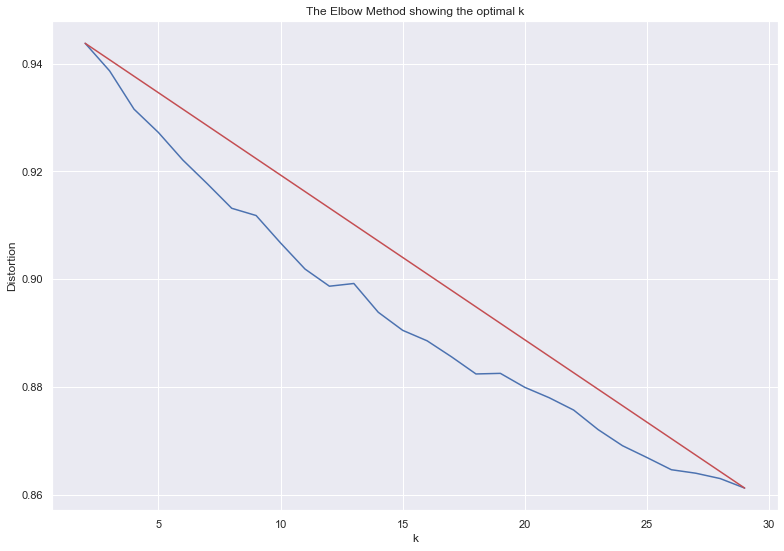

In [ ]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Run k-means

In [ ]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

# Dimensionality Reduction with t-SNE

Using [t-SNE](https://lvdmaaten.github.io/tsne) we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the body_text can be plotted. t-SNE will attempt to preserve the relations of the higher dimensional data as closely as possible when shrunk to 2D. The similar article will thus be in closer proximity to each other.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 645 samples in 0.005s...
[t-SNE] Computed neighbors for 645 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 645 / 645
[t-SNE] Mean sigma: 0.359059
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.077858
[t-SNE] KL divergence after 1000 iterations: 0.897210


C:\Users\rouxa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


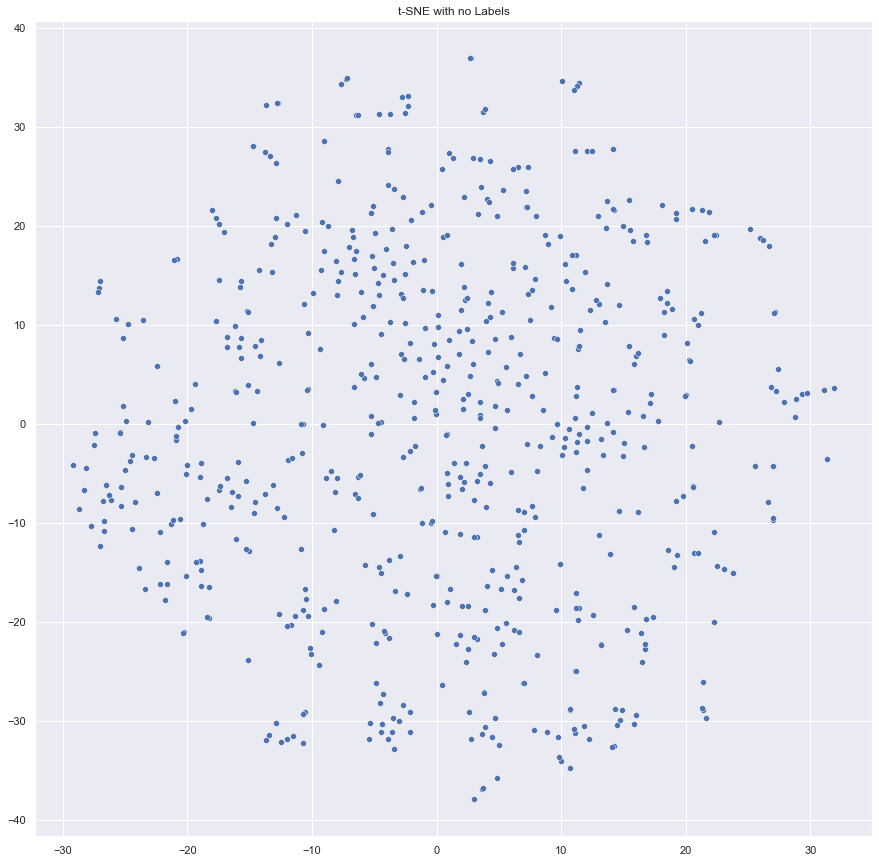

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

C:\Users\rouxa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


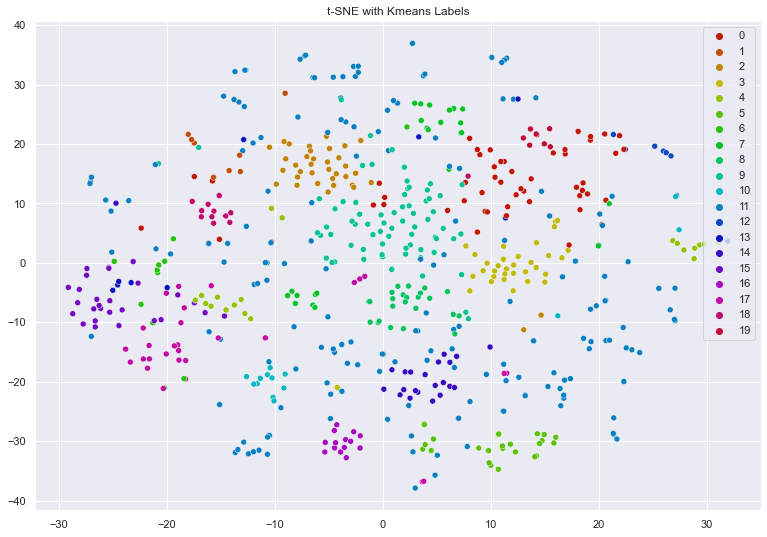

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

The labeled plot gives better insight into how the papers are grouped. Interestingly, both k-means and t-SNE can find independent clusters even though they were run independently. This shows that structure within the literature can be observed and measured to some extent. 

Now there are other cases where the colored labels are spread out on the plot. This is a result of t-SNE and k-means finding different connections in the higher dimensional data. The topics of these papers often intersect so it was hard to cleanly separate them. 

# Topic Modeling on Each Cluster

Now we will attempt to find the most significant words in each cluster. K-means clustered the articles but did not label the topics. Through topic modeling, we will find out what the most important terms for each cluster are. This will add more meaning to the cluster by giving keywords to quickly identify the themes of the cluster.

For topic modeling, we will use LDA (Latent Dirichlet Allocation). In LDA, each document can be described by a distribution of topics and each topic can be described by a distribution of words[.](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1276/0*Sj65xR38wDwuxhtr.jpg', width=800, height=800)

In [ ]:
vectorizers = []
    
for ii in range(0, 20):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [ ]:
vectorizers[0]

CountVectorizer(max_df=0.9, min_df=5, stop_words='english',
                token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}')

In [ ]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_abstract']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [ ]:
len(vectorized_data)

20

Topic modeling will be performed through the use of Latent Dirichlet Allocation (LDA). This is a generative statistical model that allows sets of words to be explained by a shared topic

In [ ]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 20


lda_models = []

for ii in range(0, 20):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(learning_method='online', n_components=20,
                          random_state=42, verbose=False)

For each cluster, we had created a corresponding LDA model in the previous step. We will now fit_transform all the LDA models on their respective cluster vectors

In [ ]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11
Current Cluster: 12
Current Cluster: 13
Current Cluster: 14
Current Cluster: 15
Current Cluster: 16
Current Cluster: 17
Current Cluster: 18
Current Cluster: 19


Extracts the keywords from each cluster

In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

Append list of keywords for a single cluster to 2D list of length NUM_TOPICS_PER_CLUSTER

In [ ]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11
Current Cluster: 12
Current Cluster: 13
Current Cluster: 14
Current Cluster: 15
Current Cluster: 16
Current Cluster: 17
Current Cluster: 18
Current Cluster: 19


In [ ]:
all_keywords[0][:10]

['expression',
 'live',
 'gene',
 'disease',
 'cell',
 'hcc',
 'immune',
 'increase',
 'case',
 'use']

In [ ]:
len(all_keywords)

20

### Save current outputs to file

Re-running some parts of the notebook (especially vectorization and t-SNE) are time-intensive tasks. We want to make sure that the important outputs for generating the bokeh plot are saved for future use.

In [ ]:
f=open('topics.txt','w')

count = 0

for ii in all_keywords:

    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(ii) + "\n")
    count += 1

f.close()

In [ ]:
# import pickle

# # save the COVID-19 DataFrame
# pickle.dump(df, open("df_art.p", "wb" ))

# # save the final t-SNE
# pickle.dump(X_embedded, open("X_embedded.p", "wb" ))

# # save the labels generate with k-means(20)
# pickle.dump(y_pred, open("y_pred.p", "wb" ))